In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kendalltau, pearsonr

In [31]:
country = "Chile"
year = 2021
geography = "province"
method = "skew"

In [3]:
df_transition = pd.read_csv(f"data_transition/{country}_{year}_{geography}_expanded.csv", encoding="latin-1")
df_transition.head()

,Unnamed: 0,GABRIEL.BORIC.FONT.GABRIEL.BORIC.FONT,JOSE.ANTONIO.KAST.RIST.GABRIEL.BORIC.FONT,YASNA.PROVOSTE.CAMPILLAY.GABRIEL.BORIC.FONT,SEBASTIAN.SICHEL.RAMIREZ.GABRIEL.BORIC.FONT,EDUARDO.ARTES.BRICHETTI.GABRIEL.BORIC.FONT,MARCO.ENRIQUEZ.OMINAMI.GUMUCIO.GABRIEL.BORIC.FONT,FRANCO.PARISI.FERNANDEZ.GABRIEL.BORIC.FONT,GABRIEL.BORIC.FONT.JOSE.ANTONIO.KAST.RIST,JOSE.ANTONIO.KAST.RIST.JOSE.ANTONIO.KAST.RIST,YASNA.PROVOSTE.CAMPILLAY.JOSE.ANTONIO.KAST.RIST,SEBASTIAN.SICHEL.RAMIREZ.JOSE.ANTONIO.KAST.RIST,EDUARDO.ARTES.BRICHETTI.JOSE.ANTONIO.KAST.RIST,MARCO.ENRIQUEZ.OMINAMI.GUMUCIO.JOSE.ANTONIO.KAST.RIST,FRANCO.PARISI.FERNANDEZ.JOSE.ANTONIO.KAST.RIST,province
0,1,0.905189,0.000000,0.697529,0.360583,0.491134,0.974138,0.330593,0,1.000000,0.300395,0.639417,0.508866,0,0.669407,ANTARTICA CHILENA
1,2,0.997334,0.012990,0.822504,0.457026,0.577145,0.997636,0.631199,0,0.986752,0.177447,0.542726,0.414126,0,0.356715,ANTOFAGASTA
2,3,0.971643,0.000000,0.797910,0.431787,0.554683,0.985578,0.410892,0,1.000000,0.202090,0.567961,0.440887,0,0.589108,ARAUCO
3,4,0.977875,0.003775,0.817902,0.446308,0.590060,0.989962,0.540223,0,0.996134,0.182098,0.553449,0.399802,0,0.451496,ARICA
4,5,1.000000,0.023565,0.868555,0.490762,0.642631,1.000000,0.610744,0,0.975989,0.131445,0.509108,0.342189,0,0.368832,AYSEN


In [32]:
df_dv = pd.read_csv(f"data_output/{country}/{year}_divisiveness_{geography}_{method}.csv.gz", compression="gzip")
df_dv = df_dv.dropna()
df_dv.head()

,candidate,value,province
0,FRANCO PARISI FERNANDEZ,0.112215,ANTARTICA CHILENA
1,GABRIEL BORIC FONT,-0.498520,ANTARTICA CHILENA
2,JOSE ANTONIO KAST RIST,0.488690,ANTARTICA CHILENA
3,MARCO ENRIQUEZ-OMINAMI GUMUCIO,-0.447296,ANTARTICA CHILENA
4,SEBASTIAN SICHEL RAMIREZ,0.555251,ANTARTICA CHILENA


In [6]:
df_location = pd.read_csv(f"data_output/{country}/{year}_first_round_location.csv.gz", compression="gzip")
df_location.head()

,polling_id,region_id,region,province,senate_district,district,commune,electoral_circ,polling_place,polling_table,polling_type,mixed_polling,voters
0,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,1,DE TARAPACA,IQUIQUE,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20,M,20M,333
1,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,1,DE TARAPACA,IQUIQUE,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,21,M,21M,340
2,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,1,DE TARAPACA,IQUIQUE,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,22,M,22M,341
3,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,1,DE TARAPACA,IQUIQUE,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,23,M,23M,344
4,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,1,DE TARAPACA,IQUIQUE,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,24,M,24M,342


In [28]:
df_fround = pd.read_csv(f"data_output/{country}/{year}_first_round.csv.gz", compression="gzip")
df_fround = pd.merge(df_fround, df_location[["polling_id", geography]], on="polling_id")
df_fround = df_fround.groupby([geography, "candidate"]).agg({"value": "sum"})
df_fround["rate"] = df_fround.groupby(level=[0]).apply(lambda x: x/x.sum())
df_fround = df_fround.reset_index()
df_fround.head()

,province,candidate,value,rate
0,ANTARTICA CHILENA,EDUARDO ARTES BRICHETTI,10.0,0.010941
1,ANTARTICA CHILENA,FRANCO PARISI FERNANDEZ,86.0,0.094092
2,ANTARTICA CHILENA,GABRIEL BORIC FONT,193.0,0.211160
3,ANTARTICA CHILENA,JOSE ANTONIO KAST RIST,455.0,0.497812
4,ANTARTICA CHILENA,MARCO ENRIQUEZ-OMINAMI GUMUCIO,30.0,0.032823


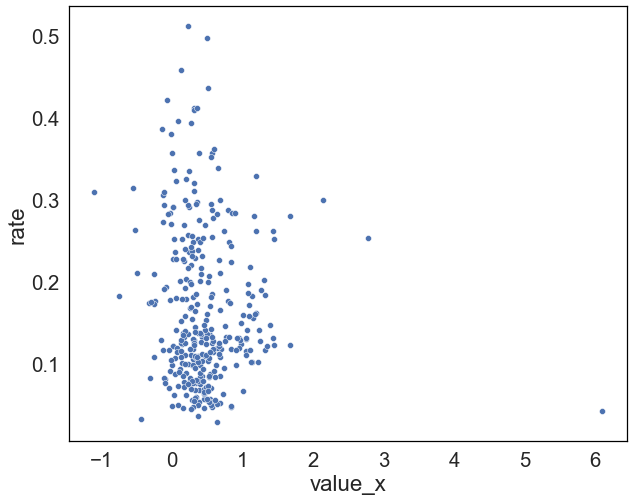

In [34]:
dd = pd.merge(df_dv, df_fround, on=[geography, "candidate"])


g = sns.scatterplot(x="value_x", y="rate", data=dd)
# g.set_xscale("log")

In [35]:
df = pd.merge(df_dv, df_transition, on=geography)
df.head()

,candidate,value,province,Unnamed: 0,GABRIEL.BORIC.FONT.GABRIEL.BORIC.FONT,JOSE.ANTONIO.KAST.RIST.GABRIEL.BORIC.FONT,YASNA.PROVOSTE.CAMPILLAY.GABRIEL.BORIC.FONT,SEBASTIAN.SICHEL.RAMIREZ.GABRIEL.BORIC.FONT,EDUARDO.ARTES.BRICHETTI.GABRIEL.BORIC.FONT,MARCO.ENRIQUEZ.OMINAMI.GUMUCIO.GABRIEL.BORIC.FONT,FRANCO.PARISI.FERNANDEZ.GABRIEL.BORIC.FONT,GABRIEL.BORIC.FONT.JOSE.ANTONIO.KAST.RIST,JOSE.ANTONIO.KAST.RIST.JOSE.ANTONIO.KAST.RIST,YASNA.PROVOSTE.CAMPILLAY.JOSE.ANTONIO.KAST.RIST,SEBASTIAN.SICHEL.RAMIREZ.JOSE.ANTONIO.KAST.RIST,EDUARDO.ARTES.BRICHETTI.JOSE.ANTONIO.KAST.RIST,MARCO.ENRIQUEZ.OMINAMI.GUMUCIO.JOSE.ANTONIO.KAST.RIST,FRANCO.PARISI.FERNANDEZ.JOSE.ANTONIO.KAST.RIST
0,FRANCO PARISI FERNANDEZ,0.112215,ANTARTICA CHILENA,1,0.905189,0.0,0.697529,0.360583,0.491134,0.974138,0.330593,0,1.0,0.300395,0.639417,0.508866,0,0.669407
1,GABRIEL BORIC FONT,-0.498520,ANTARTICA CHILENA,1,0.905189,0.0,0.697529,0.360583,0.491134,0.974138,0.330593,0,1.0,0.300395,0.639417,0.508866,0,0.669407
2,JOSE ANTONIO KAST RIST,0.488690,ANTARTICA CHILENA,1,0.905189,0.0,0.697529,0.360583,0.491134,0.974138,0.330593,0,1.0,0.300395,0.639417,0.508866,0,0.669407
3,MARCO ENRIQUEZ-OMINAMI GUMUCIO,-0.447296,ANTARTICA CHILENA,1,0.905189,0.0,0.697529,0.360583,0.491134,0.974138,0.330593,0,1.0,0.300395,0.639417,0.508866,0,0.669407
4,SEBASTIAN SICHEL RAMIREZ,0.555251,ANTARTICA CHILENA,1,0.905189,0.0,0.697529,0.360583,0.491134,0.974138,0.330593,0,1.0,0.300395,0.639417,0.508866,0,0.669407


In [36]:
candidates = ["Jean-Luc MÉLENCHON", "Emmanuel MACRON", "Marine LE PEN"]
candidates = ["FRANCO PARISI FERNANDEZ", "JOSE ANTONIO KAST RIST", "GABRIEL BORIC FONT"]
candidate_a = candidates[0].replace(" ", ".").replace("-", ".") + "." + candidates[1].replace(" ", ".")
candidate_b = candidates[0].replace(" ", ".").replace("-", ".") + "." + candidates[2].replace(" ", ".")

In [37]:
candidate_a

'FRANCO.PARISI.FERNANDEZ.JOSE.ANTONIO.KAST.RIST'

In [38]:
data = df[["candidate", geography, "value", candidate_a]]
# data = data[~data["department_id"].isin(["ZZ", "ZD", "ZA", "ZB", "ZC", "ZX", "ZS", "ZP", "ZN", "ZW", "ZM"])]

data = data[data["candidate"].isin(candidates)]

data = pd.merge(data, df_fround.rename(columns={"value": "votes"}), on=[geography, "candidate"])
data.head()

,candidate,province,value,FRANCO.PARISI.FERNANDEZ.JOSE.ANTONIO.KAST.RIST,votes,rate
0,FRANCO PARISI FERNANDEZ,ANTARTICA CHILENA,0.112215,0.669407,86.0,0.094092
1,GABRIEL BORIC FONT,ANTARTICA CHILENA,-0.498520,0.669407,193.0,0.211160
2,JOSE ANTONIO KAST RIST,ANTARTICA CHILENA,0.488690,0.669407,455.0,0.497812
3,FRANCO PARISI FERNANDEZ,ANTOFAGASTA,0.674211,0.356715,39104.0,0.299769
4,GABRIEL BORIC FONT,ANTOFAGASTA,0.327922,0.356715,29852.0,0.228844


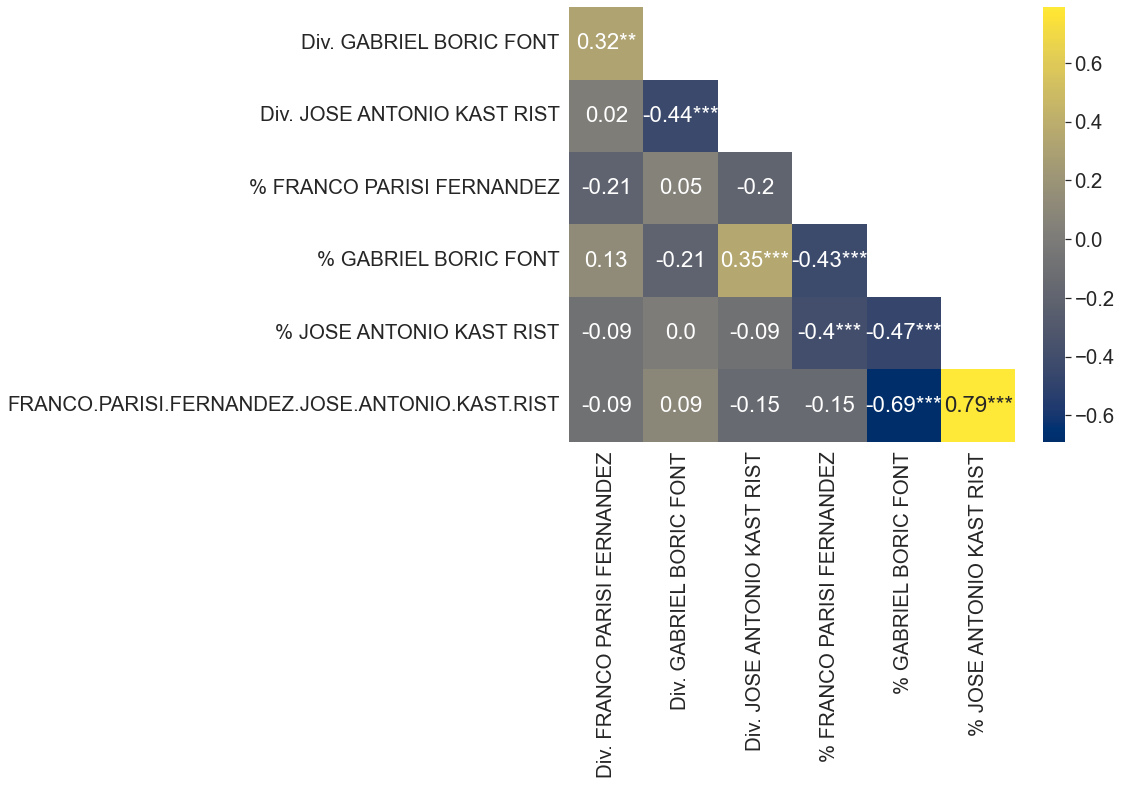

In [39]:
tbl = data.pivot(
    index=geography, 
    columns=["candidate"],
    values=["value", "rate"]
).reset_index()

def labels(x):
    if x[1] == "":
        return x[0]
    else:
        l = {"rate": "% ", "value": "Div. "}
    label = f"{l[x[0]]}{x[1]}"
    return label
tbl.columns = [labels(x) for x in list(tbl)]
tbl = pd.merge(tbl, df_transition[[geography, candidate_a]], on=geography)
m = tbl.corr()

sns.set_style("whitegrid")
sns.set(font_scale=1.85, rc={"figure.figsize": (10, 8)}, style="whitegrid")
matplotlib.rc("axes", edgecolor="#000000")
matplotlib.rcParams['axes.grid'] = False


corr_m = tbl.corr()
rho = tbl.corr()

pval = tbl.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: "".join(["*" for t in [0.01, 0.05, 0.1] if x<=t]))
p = rho.round(2).astype(str) + p

p = np.tril(p.values, k=-1)

p[p==0] = np.nan
p = pd.DataFrame(p).dropna(axis=0, how="all").dropna(axis=1, how="all")

# np.fill_diagonal(corr_m.values, np.nan)
labels_m = list(corr_m)
corr_m = np.tril(corr_m.values, k=-1)

corr_m[corr_m==0] = np.nan

heatmap_data = pd.DataFrame(corr_m, index=labels_m, columns=labels_m).round(2)\
                .dropna(axis=0, how="all")\
                .dropna(axis=1, how="all")

g = sns.heatmap(heatmap_data, annot=p, center=0, cmap="cividis", fmt="", cbar=True)

<AxesSubplot:xlabel='diff', ylabel='diff2'>

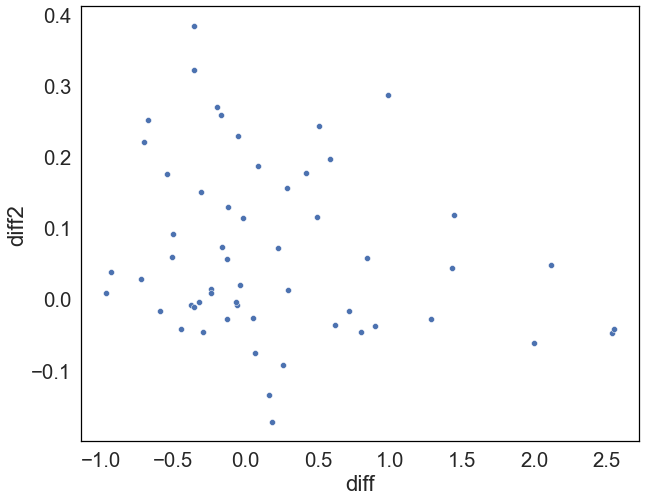

In [40]:
aa = data[data["candidate"] == candidates[1]]
bb = data[data["candidate"] == candidates[2]]

cc = pd.merge(aa, bb, on=geography)
cc["diff"] = cc["value_x"] - cc["value_y"]
cc["diff2"] = cc["rate_x"] - cc["rate_y"]

sns.scatterplot(x="diff", y="diff2", data=cc)

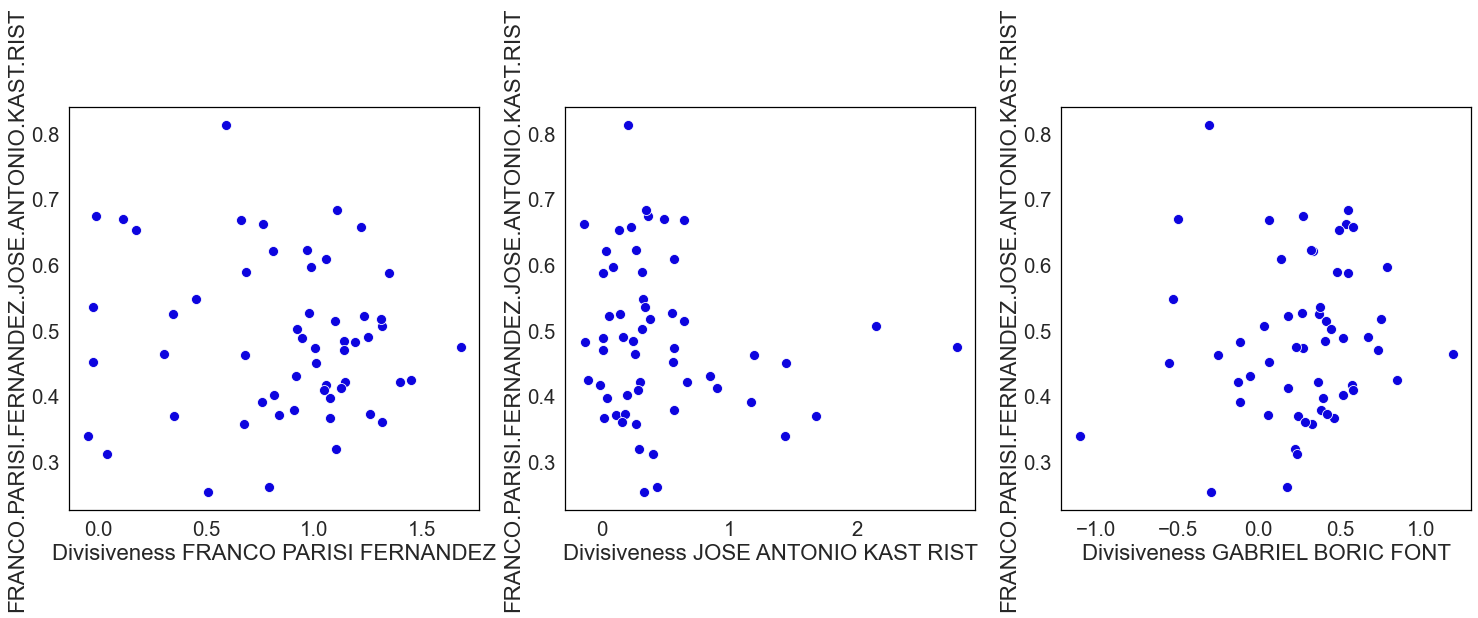

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))

for idx, candidate in enumerate(candidates):
    g = sns.scatterplot(x="value", s=100, color="#0D04DF", y=candidate_a, data=data[data["candidate"] == candidate], ax=axs[idx])
    g.set_xlabel(f"Divisiveness {candidate}")
    
#     for x, tmp in data[data["candidate"] == candidate].iterrows():
#         g.text(tmp["value"], tmp[candidate_a], tmp[geography])

fig.tight_layout()